EPOCH 1 Completed, Loss: 1.082, Validation Accuracy: 0.7948
EPOCH 2 Completed, Loss: 0.806, Validation Accuracy: 0.8560
EPOCH 3 Completed, Loss: 0.609, Validation Accuracy: 0.8791
EPOCH 4 Completed, Loss: 0.543, Validation Accuracy: 0.8887
EPOCH 5 Completed, Loss: 0.432, Validation Accuracy: 0.8947
EPOCH 6 Completed, Loss: 0.421, Validation Accuracy: 0.9002
EPOCH 7 Completed, Loss: 0.394, Validation Accuracy: 0.9029
EPOCH 8 Completed, Loss: 0.376, Validation Accuracy: 0.9052
EPOCH 9 Completed, Loss: 0.379, Validation Accuracy: 0.9076
EPOCH 10 Completed, Loss: 0.249, Validation Accuracy: 0.9089
EPOCH 11 Completed, Loss: 0.430, Validation Accuracy: 0.9111
EPOCH 12 Completed, Loss: 0.409, Validation Accuracy: 0.9135
EPOCH 13 Completed, Loss: 0.322, Validation Accuracy: 0.9130
EPOCH 14 Completed, Loss: 0.271, Validation Accuracy: 0.9158
EPOCH 15 Completed, Loss: 0.328, Validation Accuracy: 0.9164
EPOCH 16 Completed, Loss: 0.322, Validation Accuracy: 0.9172
EPOCH 17 Completed, Loss: 0.275, 

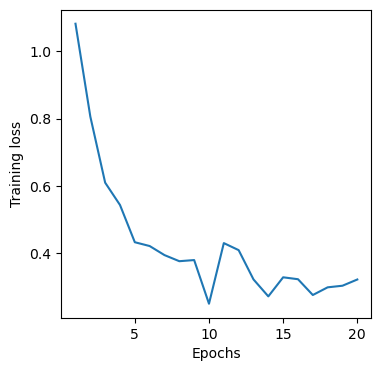

ReLU Test Accuracy: 92.25 %


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

# load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Data split 
x_train, x_valid = x_train[:50000], x_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

# Flatten data into row vectors and normalize into [0,1]
x_train = x_train.reshape(50000,28*28)/256
x_valid = x_valid.reshape(-1, 28*28)/256
x_test  = x_test.reshape(-1, 28*28)/256

y_train_one_hot = np.eye(10)[y_train]

# dimensions
INPUT_DIM=28*28
HIDDEN_DIM=100
OUTPUT_DIM=10

def sigmoid(z):
    return 1. / (1.+ np.exp(-z))

######################################################################################
############################## COMPLETE THE FUNCTION #################################
def relu(z):
    return np.maximum(0,z)
######################################################################################

def softmax(Z):
    maxes = np.max(Z, axis=1, keepdims=True)
    e = np.exp(Z-maxes)
    p = e / np.sum(e, axis=1, keepdims=True)
    return p

# Forward pass
def forward_NN(X, params, activation):
    forwardpass = {}
    forwardpass['Z1'] = np.matmul(X, params['W1']) + params['b1']
    forwardpass['A'] = activation(forwardpass['Z1'])
    forwardpass['Z2'] = np.matmul(forwardpass['A'], params['W2']) + params['b2']
    forwardpass['Y_hat'] = softmax(forwardpass['Z2'])
    return forwardpass

# Define Cross entropy loss
def CrossEntropyLoss(y, y_hat):
    # y: true label (one-hot code)
    # y_hat: predicted probability
    # Batch Size: N
    N = y.shape[0]
    loss = -(1/N) * np.sum(y * np.log(y_hat + 1e-5))
    return loss

def L2_regularization(params, weight_decay):
    # weight decay (lambda): small positive number
    sum = 0
    sum += np.sum(params['W1']**2)
    sum += np.sum(params['b1']**2)
    sum += np.sum(params['W2']**2)
    sum += np.sum(params['b2']**2)
    reg = (weight_decay/2)*sum
    return reg


# BackPropagation
def backward(X, y, forwardpass, params, activation):
    '''
    grads['Z2']: (batch, OUTPUT_DIM)
    grads['W2']: (HIDDEN_DIM, OUTPUT_DIM)
    grads['b2']: (1, OUTPUT_DIM)
    grads['A'] : (batch, HIDDEN_DIM)
    grads['Z1']: (batch, HIDDEN_DIM)
    grads['W1']: (INPUT_DIM, HIDDEN_DIM)
    grads['b1']: (1, HIDDEN_DIM)
    X :          (batch, INPUT_DIM)
    '''
    N = X.shape[0]
    grads={}
    grads['Z2'] = (1/N) * (forwardpass['Y_hat'] - y)
    grads['W2'] = np.sum(np.matmul( forwardpass['A'].reshape(N,-1,1), grads['Z2'].reshape(N,1,-1)), 
                         axis=0, keepdims=False)
    grads['b2'] = np.sum(grads['Z2'], axis=0, keepdims=True)
    grads['A']  = np.matmul(grads['Z2'], params['W2'].T)

    if activation == sigmoid:
        grads['Z1'] = grads['A'] * forwardpass['A'] * (1-forwardpass['A'])

    ######################################################################################
    ############################### COMPLETE THE LINE  ###################################   
    elif activation == relu:
        grads['Z1'] = grads['A'] * (forwardpass['A']>0)


    ######################################################################################
    
    grads['W1'] = np.sum( np.matmul(X.reshape(N,-1,1), grads['Z1'].reshape(N,1,-1)), axis=0, keepdims=False)
    grads['b1'] = np.sum( grads['Z1'], axis=0, keepdims=True)

    return grads

# Gradient Descent
def update_params(params, grads, eta, weight_decay):
    params['W1'] -= eta * ( grads['W1'] + weight_decay*params['W1'] )
    params['b1'] -= eta * ( grads['b1'] + weight_decay*params['b1'] )
    params['W2'] -= eta * ( grads['W2'] + weight_decay*params['W2'] )
    params['b2'] -= eta * ( grads['b2'] + weight_decay*params['b2'] )
    return params

# Set Hyperparameters
BATCH_SIZE=250
EPOCHS=20
LR = 0.01
WEIGHT_DECAY = 0.0001


## Used for validation check or evaluation check

def predict(X, y, params, activation):
    prob = forward_NN(X, params, activation)['Y_hat']
    pred = np.argmax(prob, axis=1)
    acc = np.sum(pred == y) / y.shape[0]
    return pred, acc

######################################################################################
########################## COMPLETE THE INITIALIZATION  ##############################
##########################     for RELU activation      ##############################
ReLUParams = {
    'W1': np.random.randn(INPUT_DIM, HIDDEN_DIM) * np.sqrt(2/INPUT_DIM), 
    'b1': np.zeros((1, HIDDEN_DIM)),
    'W2': np.random.randn(HIDDEN_DIM, OUTPUT_DIM) * np.sqrt(2/HIDDEN_DIM),
    'b2': np.zeros((1, OUTPUT_DIM))
    }
######################################################################################

# Training Session
losses_relu = np.zeros(EPOCHS)

start = datetime.now()
for epoch in range(EPOCHS):
    idx = np.random.permutation(50000)
    x_temp = x_train[idx]
    y_temp = y_train_one_hot[idx]
    
    for batch in range(x_train.shape[0]//BATCH_SIZE):
        X = x_temp[batch*BATCH_SIZE:(batch+1)*BATCH_SIZE]
        y = y_temp[batch*BATCH_SIZE:(batch+1)*BATCH_SIZE]
        
        forwardpass = forward_NN(X, ReLUParams, relu)
        loss = CrossEntropyLoss(y, forwardpass['Y_hat']) + L2_regularization(ReLUParams, WEIGHT_DECAY)
        grads = backward(X, y, forwardpass, ReLUParams, relu)
        
        ReLUParams = update_params(ReLUParams, grads, LR, WEIGHT_DECAY)
    
    losses_relu[epoch] = loss    
    pred, valid_acc = predict(x_valid, y_valid, ReLUParams, relu)
    
    print('EPOCH %d Completed, Loss: %.3f, Validation Accuracy: %.4f' % (epoch+1, loss, valid_acc))

end = datetime.now()
print('Total time:', end-start)

plt.figure(figsize=(4,4))
plt.plot(np.arange(1, EPOCHS+1), losses_relu)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

# Inference/Test Session
pred, test_acc = predict(x_test, y_test, ReLUParams, relu)
print('ReLU Test Accuracy:', test_acc*100,'%')